In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Набор данных по оттоку клиентов.

## Описание полей
* state – штат;
* account length – абонентский стаж;
* area code – код региона;
* phone number – номер телефона;
* international plan – тарифный план для международных звонков;
* voice mail plan – тарифный план для голосовой почты;
* number vmail messages – количество сообщений голосовой почты;
* total day minutes – общая длительность звонков в дневное время (мин);
* total day calls – общее количество звонков в дневное время;
* total day charge – общая стоимость звонков в дневное время;
* total eve minutes – общая длительность звонков в вечернее время (мин);
* total eve calls – общее количество звонков в вечернее время;
* total eve charge – общая стоимость звонков в вечернее время;
* total night minutes – общая длительность звонков в ночное время (мин);
* total night calls – общее количество звонков в ночное время;
* total night charge – общая стоимость звонков в ночное время;
* total intl minutes – общая длительность международных звонков (мин);
* total intl calls – общее количество международных звонков;
* total intl charge – общая стоимость международных звонков;
* number customer service calls – количество звонков в службу поддержки.
* churned – покинул ли клиент компанию

## Задачи

* Построить гистограмму количества звонков в техническую поддержку
* Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)
* Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции общего количества минут и количества звонков в техподдержку
* Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
* Вывести top-5 самых много и самых мало говорящих клиентов
* Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора  в зависимости от штата
* Перевести штат в one-hot формат при помощи pandas-функции get_dummies
* Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)
* Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

## Загрузка данных

In [253]:
churn_df = pd.read_csv('./Data/churn.csv')
churn_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Информация о данных

In [254]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [255]:
churn_df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Гистограмма количества звонков в тех поддержку

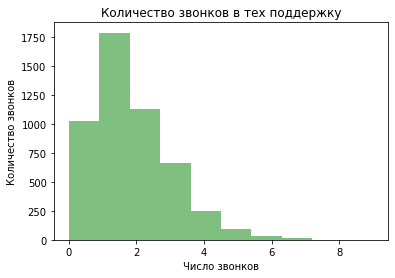

In [256]:
plt.hist(churn_df['number_customer_service_calls'], color='green', alpha=0.5)
plt.title('Количество звонков в тех поддержку')
plt.xlabel('Число звонков')
plt.ylabel('Количество звонков')
plt.show()

## Гистограмма общей длительности звонков клиента (дневных + ночных + вечерних + международны)

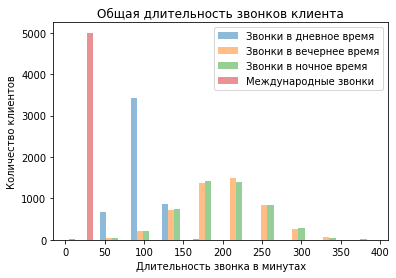

In [257]:
plt.hist(churn_df[['total_day_calls', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']], alpha=0.5)
plt.title('Общая длительность звонков клиента')
plt.xlabel('Длительность звонка в минутах')
plt.ylabel('Количество клиентов')
plt.legend(['Звонки в дневное время', 'Звонки в вечернее время', 'Звонки в ночное время', 'Международные звонки'])
plt.show()

## Линейный коэффициент корреляции общего количества минут и количества звонков в техподдержку
$$ r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}$$

In [258]:
def correlation_coeff(x, y):
    correlation_coefficient = 0
    
    sum_upper = 0
    sum_lower_factor_one = 0
    sum_lower_factor_two = 0
    
    X_MEAN = np.mean(x)
    Y_MEAN = np.mean(y)
    LEN_DF = len(x)
    
    for i in range(LEN_DF):
        sum_upper += (x[i] - X_MEAN) * (y[i] - Y_MEAN)
        sum_lower_factor_one += (x[i] - X_MEAN) ** 2
        sum_lower_factor_two += (y[i] - Y_MEAN) ** 2
        
    return np.round(sum_upper / np.sqrt(sum_lower_factor_one * sum_lower_factor_two), 6)

In [259]:
# общее количсество минут
total_minutes_df = pd.DataFrame(churn_df['total_day_calls'] + \
                                churn_df['total_eve_minutes'] + \
                                churn_df['total_night_minutes'] +\
                                churn_df['total_intl_minutes'],
                                columns=['total_minutes'])

In [260]:
# Коэффициент корреляции
correlation_coeff(churn_df['number_customer_service_calls'], total_minutes_df['total_minutes'])

-0.018681

## Точечный график по общему количеству минут / количеству звонков в поддержку (точки покрашены в зависимости от оттока абонента)

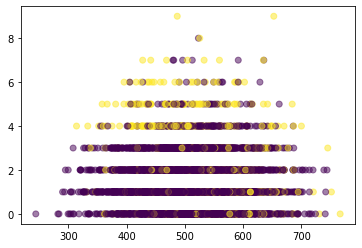

In [261]:
plt.scatter(
    total_minutes_df['total_minutes'], 
    churn_df['number_customer_service_calls'], 
    c=churn_df['churned'],
    alpha=0.5
)

## Top-5 самых много и самых мало говорящих клиентов

In [262]:
churn_df['total_minutes'] = churn_df['total_day_calls'] + \
                            churn_df['total_eve_minutes'] + \
                            churn_df['total_night_minutes'] + \
                            churn_df['total_intl_minutes']

In [263]:
churn_df.sort_values(by='total_minutes').head(5) # top-5 самых малоговорящих клиентов

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_minutes
1233,IL,48,510,380-5246,no,no,0,128.2,71,21.79,...,4.09,116.3,80,5.23,8.9,3,2.40,0,False,244.3
1789,GA,133,510,393-3194,no,no,0,227.4,90,38.66,...,6.22,114.3,99,5.14,4.7,7,1.27,0,False,282.2
1190,NE,149,415,369-5942,no,no,0,156.0,56,26.52,...,4.76,163.3,104,7.35,8.9,8,2.40,0,False,284.2
533,OK,125,415,406-5059,no,yes,36,201.3,117,34.22,...,3.59,125.7,104,5.66,5.4,3,1.46,1,False,290.3
3399,LA,85,408,409-7595,no,no,0,209.1,57,35.55,...,9.41,113.3,113,5.10,12.8,4,3.46,1,False,293.8


In [264]:
churn_df.sort_values(by='total_minutes', ascending=False).head(5) # top-5 самых разговорчивых клиентов

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_minutes
302,RI,121,408,329-7347,no,no,0,170.4,108,28.97,...,29.79,297.0,87,13.37,11.2,3,3.02,0,True,766.7
580,IN,113,415,353-6007,no,no,0,209.4,151,35.60,...,29.52,246.0,116,11.07,7.4,2,2.00,1,True,751.7
507,MO,92,415,405-3916,no,no,0,154.0,122,26.18,...,28.03,288.0,117,12.96,5.6,2,1.51,3,True,745.4
1317,NE,89,415,420-6414,no,yes,29,163.5,80,27.80,...,23.36,381.9,147,17.19,7.5,5,2.03,2,False,744.2
913,GA,50,408,377-1218,no,yes,24,214.3,129,36.43,...,24.63,312.5,130,14.06,10.6,4,2.86,1,False,741.9


## Доля оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [265]:
churn_group_by_state = churn_df.groupby('state').agg({'total_day_charge': 'mean', 'churned': 'count'})
churn_group_by_state['churned'] = (churn_group_by_state['churned'] / len(churn_df)) * 100
churn_group_by_state.columns = ['mean_day_charge', 'percent_churned']
churn_group_by_state.reset_index()

,state,mean_day_charge,percent_churned
0,AK,30.763333,1.44
1,AL,32.210887,2.48
2,AR,29.782065,1.84
3,AZ,29.998315,1.78
4,CA,29.399038,1.04
5,CO,29.990521,1.92
6,CT,29.848384,1.98
7,DC,29.313068,1.76
8,DE,31.203085,1.88
9,FL,29.982222,1.80


## Перевод штата в one-hot формат при помощи pandas-функции get_dummies

In [266]:
churn_onehot_df = pd.get_dummies(churn_df, columns=['state'], prefix='state')

## Разбиение данных на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [267]:
X = churn_onehot_df.drop([
    'phone_number', 
    'area_code', 
    'international_plan', 
    'voice_mail_plan', 
    'churned', 
    'total_minutes'], axis=1)

y = churn_onehot_df['churned']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Модель логичеической регрессии

In [269]:
log_reg_model = LogisticRegression()

In [270]:
log_reg_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Оценка модели

In [271]:
y_pred = log_reg_model.predict(X_test)

In [272]:
accuracy_score(y_test, y_pred)

0.8660606060606061